In [2]:
%matplotlib notebook
from astropy import units as u
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

from astropy import time
from astropy import coordinates

from poliastro.bodies import Earth, Mars, Sun, Jupiter
from poliastro.twobody import Orbit
from poliastro import ephem
import poliastro

In [3]:
from astropy.coordinates import solar_system_ephemeris
solar_system_ephemeris.set("jpl")

<ScienceState solar_system_ephemeris: 'jpl'>

In [4]:
epoch = time.Time("2019-08-14T15:30:00", scale='tdb')
defaultPlane = poliastro.frames.HCRS

In [5]:
objId = 20776
oJKRU = Orbit.from_horizons(objId)


oEarth = Orbit.from_body_ephem(Earth, epoch)
oSun = Orbit.from_body_ephem(Sun, epoch)
oJupiter = Orbit.from_body_ephem(Jupiter, epoch)

objId = 20776
oJKRU = Orbit.from_horizons(objId)

objIdH = '1P'
objIdH = '90000033'
oHalley = Orbit.from_horizons(objIdH)
# from astroquery.jplhorizons import Horizons
# oJKRU = Horizons(objId, epochs=epoch.jd)

In [10]:
(oEarth.r, oSun.r, oJupiter.r, oJKRU.r, oHalley.r)

(<Quantity [ 1.17876174e+08, -8.58902570e+07, -3.72348329e+07] km>,
 <Quantity [-392057.69651714, 1044831.49846872,  451524.03122083] km>,
 <Quantity [-7.69985643e+07, -7.21827583e+08, -3.07526682e+08] km>,
 <Quantity [-2.85502421e+08, -3.32598741e+08, -1.09521420e+08] km>,
 <Quantity [-3.04180923e+09,  4.23252621e+09,  2.09970341e+08] km>)

<IPython.core.display.Javascript object>


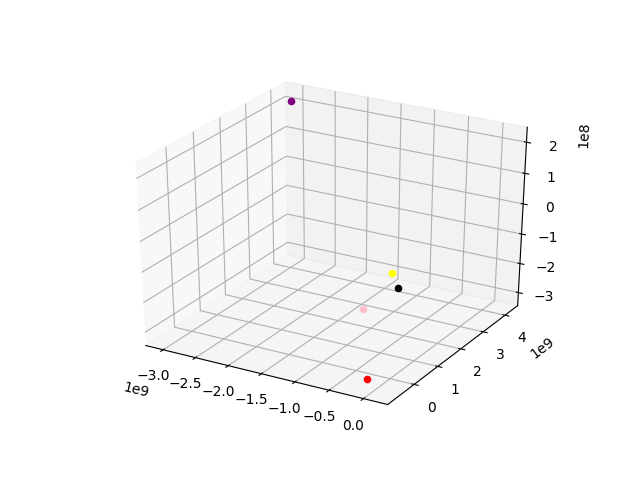

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(oEarth.r[0], oEarth.r[1], oEarth.r[2],  color='black')
ax.scatter(oSun.r[0], oSun.r[1], oSun.r[2],  color='yellow')
ax.scatter(oJupiter.r[0], oJupiter.r[1], oJupiter.r[2],  color='red')
ax.scatter(oJKRU.r[0], oJKRU.r[1], oJKRU.r[2],  color='pink')
ax.scatter(oHalley.r[0], oHalley.r[1], oHalley.r[2], color='purple')

In [12]:
epoch = time.Time("2019-08-14T15:30:00", scale='tdb')
objId = 20776
objIdH = 90000033

orbits = dict()
orbits['Sun'] = []
orbits['Earth'] = []
orbits['Jupiter'] = []
orbits['jkru'] = []
orbits['halley'] = []

for incr in range(0, 200):
    epoch = epoch + time.TimeDelta(7, format='jd')
    oEarth = Orbit.from_body_ephem(Earth, epoch)
    oSun = Orbit.from_body_ephem(Sun, epoch)
    oJupiter = Orbit.from_body_ephem(Jupiter, epoch)
    oJKRU = Orbit.from_horizons(objId, epoch)
    oHalley = Orbit.from_horizons(objIdH, epoch)
    print(incr, epoch)
    print(" ", oSun.r, oJKRU.r)
    z0 = 0
    orbits['Sun'].append([oSun.r[0].value, oSun.r[1].value, oSun.r[2].value])
    orbits['Earth'].append([oEarth.r[0].value, oEarth.r[1].value, oEarth.r[2].value])
    orbits['Jupiter'].append([oJupiter.r[0].value, oJupiter.r[1].value, oJupiter.r[2].value])
    orbits['jkru'].append([oJKRU.r[0].value, oJKRU.r[1].value, oJKRU.r[2].value])
    orbits['halley'].append([oHalley.r[0].value, oHalley.r[1].value, oHalley.r[2].value])

orbits['Sun'] = np.array(orbits['Sun'])
orbits['Earth'] = np.array(orbits['Earth'])
orbits['Jupiter'] = np.array(orbits['Jupiter'])
orbits['jkru'] = np.array(orbits['jkru'])
orbits['halley'] = np.array(orbits['halley'])

0 2019-08-21T15:30:00.000
  [-400905.12191845 1044296.91495851  451547.13578551] km [-2.99361122e+08 -3.21938147e+08 -1.05402427e+08] km
1 2019-08-28T15:30:00.000
  [-409760.39440951 1043693.00090361  451541.63729605] km [-2.92094575e+08 -3.27656985e+08 -1.07607598e+08] km
2 2019-09-04T15:30:00.000
  [-418625.28093689 1043017.55503944  451506.70940506] km [-2.84674331e+08 -3.33203606e+08 -1.09756232e+08] km
3 2019-09-11T15:30:00.000
  [-427499.67126555 1042267.72055394  451440.99136579] km [-2.77104129e+08 -3.38574903e+08 -1.11847135e+08] km
4 2019-09-18T15:30:00.000
  [-436382.16321065 1041441.16888448  451343.27538461] km [-2.69387757e+08 -3.43767809e+08 -1.13879130e+08] km
5 2019-09-25T15:30:00.000
  [-445270.81713704 1040536.17275572  451212.61772348] km [-2.61529057e+08 -3.48779303e+08 -1.15851050e+08] km
6 2019-10-02T15:30:00.000
  [-454163.4273379  1039551.43986398  451048.27175597] km [-2.53531925e+08 -3.53606402e+08 -1.17761743e+08] km
7 2019-10-09T15:30:00.000
  [-463057.5786

60 2020-10-14T15:30:00.000
  [-912256.8313992   876930.14235151  394649.02131637] km [ 2.46981874e+08 -2.78283962e+08 -1.04529835e+08] km
61 2020-10-21T15:30:00.000
  [-919866.05558008  871931.55983504  392730.6800454 ] km [ 2.54297610e+08 -2.70114029e+08 -1.01848942e+08] km
62 2020-10-28T15:30:00.000
  [-927427.1960827   866877.99116617  390787.97350974] km [ 2.61396591e+08 -2.61714031e+08 -9.90813277e+07] km
63 2020-11-04T15:30:00.000
  [-934942.31077356  861771.20773015  388821.99272282] km [ 2.68269651e+08 -2.53088012e+08 -9.62281707e+07] km
64 2020-11-11T15:30:00.000
  [-942414.95500989  856611.52873078  386833.23708978] km [ 2.74907592e+08 -2.44240352e+08 -9.32907665e+07] km
65 2020-11-18T15:30:00.000
  [-949848.05740186  851397.1519499   384821.03628269] km [ 2.81301194e+08 -2.35175780e+08 -9.02705324e+07] km
66 2020-11-25T15:30:00.000
  [-957242.69850025  846125.69871283  382784.24722696] km [ 2.87441228e+08 -2.25899384e+08 -8.71690125e+07] km
67 2020-12-02T15:30:00.000
  [-964

119 2021-12-01T15:30:00.000
  [-1267535.10697341   484411.13896771   237488.69896912] km [1.05217977e+08 2.99505783e+08 1.02607757e+08] km
120 2021-12-08T15:30:00.000
  [-1271376.96175315   476309.88005888   234150.1579134 ] km [9.31778729e+07 3.03746276e+08 1.04421078e+08] km
121 2021-12-15T15:30:00.000
  [-1275131.05164294   468187.68336277   230800.35142251] km [8.10168022e+07 3.07592612e+08 1.06098898e+08] km
122 2021-12-22T15:30:00.000
  [-1278798.90964079   460046.29074556   227440.08301568] km [6.87513651e+07 3.11042918e+08 1.07640116e+08] km
123 2021-12-29T15:30:00.000
  [-1282382.10457583   451887.21848657   224070.06854696] km [5.63980876e+07 3.14096074e+08 1.09043897e+08] km
124 2022-01-05T15:30:00.000
  [-1285882.1908495    443711.97360042   220691.05317572] km [4.39733740e+07 3.16751703e+08 1.10309671e+08] km
125 2022-01-12T15:30:00.000
  [-1289301.09740611   435522.34608846   217304.01320169] km [3.14934630e+07 3.19010145e+08 1.11437126e+08] km
126 2022-01-19T15:30:00.000

177 2023-01-11T15:30:00.000
  [-1352909.42020737   -12587.0590472     28883.29410663] km [-4.20353283e+08  3.50509351e+07  2.35392742e+07] km
178 2023-01-18T15:30:00.000
  [-1351730.34548271   -21215.55388438    25196.39499281] km [-4.22574393e+08  2.55934352e+07  2.02698745e+07] km
179 2023-01-25T15:30:00.000
  [-1350459.52440768   -29823.10242126    21515.99051438] km [-4.24526131e+08  1.61195898e+07  1.69875417e+07] km
180 2023-02-01T15:30:00.000
  [-1349097.2887132    -38408.53078988    17842.46058554] km [-4.26209798e+08  6.63553572e+06  1.36944702e+07] km
181 2023-02-08T15:30:00.000
  [-1347644.08692453   -46970.25105599    14176.41723759] km [-4.27626802e+08 -2.85269924e+06  1.03928191e+07] km
182 2023-02-15T15:30:00.000
  [-1346100.6948933    -55506.54084777    10518.58273019] km [-4.28778654e+08 -1.23391944e+07  7.08471246e+06] km
183 2023-02-22T15:30:00.000
  [-1344468.20203618   -64015.73000043     6869.69429846] km [-4.29666959e+08 -2.18181341e+07  3.77223967e+06] km
184 20

<IPython.core.display.Javascript object>


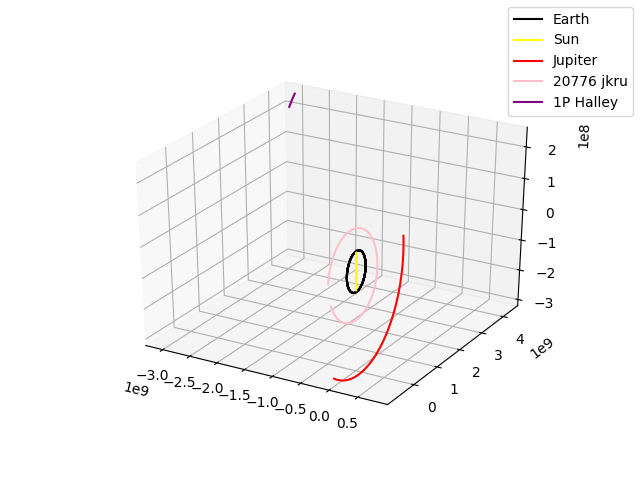

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(orbits['Earth'][:, 0], orbits['Earth'][:,1], orbits['Earth'][:,2],  color='black', label='Earth')
ax.plot(orbits['Sun'][:,0], orbits['Sun'][:,1], orbits['Earth'][:,2],  color='yellow', label='Sun')
ax.plot(orbits['Jupiter'][:,0], orbits['Jupiter'][:,1], orbits['Jupiter'][:,2],  color='red', label='Jupiter')
ax.plot(orbits['jkru'][:,0], orbits['jkru'][:,1], orbits['jkru'][:,2],  color='pink', label='20776 jkru')
ax.plot(orbits['halley'][:,0], orbits['halley'][:,1], orbits['halley'][:,2], color='purple', label='1P Halley')
fig.legend()

In [14]:
plt.savefig("/tmp/orbits.png")

In [13]:
(oJKRU.ecc, "eccentricity", oJKRU.inc, "inclination", oJKRU.a, "semi-major axis",
 oJKRU.raan, "RA of ascending node", oJKRU.argp, "argument of the pericenter",
 oJKRU.nu, "true anomaly", oJKRU.epoch, "epoch")

(<Quantity 0.15713128>,
 'eccentricity',
 <Quantity 19.44123104 deg>,
 'inclination',
 <Quantity 2.60936713 AU>,
 'semi-major axis',
 <Quantity 4.3304772 deg>,
 'RA of ascending node',
 <Quantity 41.39928526 deg>,
 'argument of the pericenter',
 <Quantity 157.58976542 deg>,
 'true anomaly',
 <Time object: scale='tdb' format='isot' value=2023-06-14T15:30:00.000>,
 'epoch')

In [15]:
# This doesn't seem to correctly reproject the orbits into the frame I think it should.
#  I'll have to read the docs more: https://docs.poliastro.space/en/stable/
def konvert(orbit):
    k = coordinates.SkyCoord(x=orbit.r[0], y=orbit.r[1], z=orbit.r[2],
                         frame=orbit.frame,
                         unit='km', representation_type='cartesian')
    h = k.heliocentricmeanecliptic.cartesian
    return(list(h.x.value, h.y.value, h.z.value))

In [16]:
oJKRU.pqw()

(<Quantity [0.70089051, 0.67845784, 0.2201078 ]>,
 <Quantity [-0.71282596,  0.65539626,  0.24966957]>,
 <Quantity [ 0.02513245, -0.33188958,  0.94298338]>)

In [17]:
oEarth.pqw()

(<Quantity [0.26882599, 0.88381388, 0.38289112]>,
 <Quantity [-0.96318876,  0.24664395,  0.10693073]>,
 <Quantity [ 6.90807160e-05, -3.97542183e-01,  9.17583897e-01]>)

In [6]:
oBor = Orbit.from_horizons("C/2019 Q4")


In [7]:
oBor

305847651 x -548428705 km x 60.5 deg (HCRS) orbit around Sun (☉) at epoch 2019-09-12 16:01:00.208585 (TDB)

In [8]:
oBor.classical

<bound method Orbit.classical of 305847651 x -548428705 km x 60.5 deg (HCRS) orbit around Sun (☉) at epoch 2019-09-12 16:01:00.208585 (TDB)>

In [9]:
dir(oBor)

['L',
 'M',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_epoch',
 '_frame',
 '_generate_time_values',
 '_plane',
 '_sample_closed',
 '_sample_open',
 '_state',
 'a',
 'apply_maneuver',
 'arglat',
 'argp',
 'attractor',
 'change_attractor',
 'circular',
 'classical',
 'e_vec',
 'ecc',
 'energy',
 'epoch',
 'f',
 'frame',
 'from_body_ephem',
 'from_classical',
 'from_coords',
 'from_equinoctial',
 'from_horizons',
 'from_sbdb',
 'from_vectors',
 'frozen',
 'g',
 'geostationary',
 'h',
 'h_mag',
 'h_vec',
 'inc',
 'k',
 'n',
 'nu',
 'p',
 'parabolic',
 'period',
 'plane',
 'plot',
 'pqw',
 'propagate',
 'propagate_to_anomaly',
 'r',
 'r_a',
 'r_p',
 'raan',
 'represe

In [10]:
oBor.plot

<bound method Orbit.plot of 305847651 x -548428705 km x 60.5 deg (HCRS) orbit around Sun (☉) at epoch 2019-09-12 16:01:00.208585 (TDB)>

In [12]:
from poliastro.plotting import OrbitPlotter
op = OrbitPlotter2D()
op.plot(oBor, label="Borizov")

ImportError: cannot import name 'OrbitPlotter'